# Clasificadores K means

Los clasificadores REALMENTE implementan modulos, pero estos modulos no se consideran algoritmos, sin embargo, la IA usa mas estadistica mientras que un clasificador si implementa algoritmos.

Veremos un ejemplo respecto a la tipificacion de personas, el algoritmo toma los valores como centros y los empieza a distribuir.

La segmentacion es hacia los mas cercanos

## Aprendizaje automatico (Machine Learning)

K. Means

In [1]:
import pandas as pd

In [2]:
ruta = "./public/csv/Mall_Customers-2.csv"

In [3]:
dataframe = pd.read_csv(ruta, index_col=0)

In [4]:
dataframe.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [6]:
# Si hay valores nulos, se pueden rellenar los valores nulos
# eliminarlos si no son necesarios y la muestra es grande
# puedo usar un cuartil para rellenar los valores nulos
# puedo usar la media, moda o mediana para rellenar los valores nulos

# renombrar columnas
dataframe.rename(columns={"Annual Income (k$)": "ingresos", "Spending Score (1-100)": "gastos", "Age": "edad", "Gender": "genero"}, inplace=True)

### Analsiis exploratorio

In [7]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
edad,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
ingresos,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
gastos,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [8]:
dataframe["genero"].value_counts()

genero
Female    112
Male       88
Name: count, dtype: int64

### Segmentacion tradicional

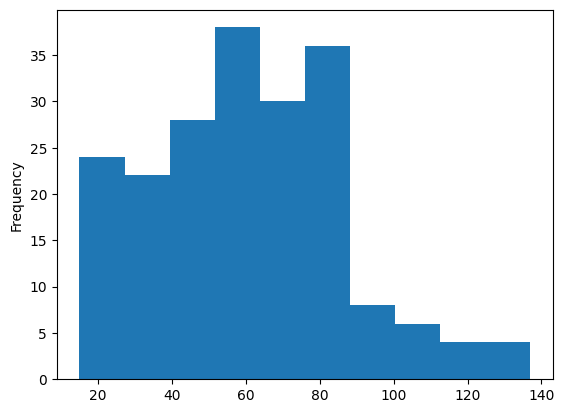

In [9]:
dataframe.ingresos.plot(kind="hist");

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

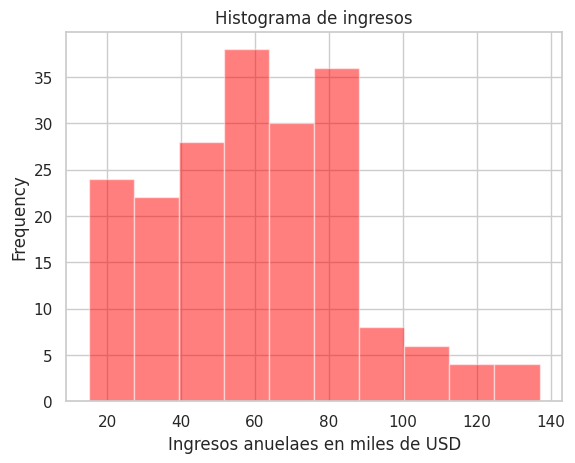

In [11]:
dataframe.ingresos.plot(kind="hist", color="red", alpha=0.5)
plt.title("Histograma de ingresos")
plt.xlabel("Ingresos anuelaes en miles de USD");

**REGLAS A  SSEGUIR PARA CLASIFICAR DE FORMA TRADICIONAL**

- Ingreso < 50 *entonces* **ingreso bajo**
- 50 <= Ingreso <= 90 *entonces* **ingreso moderado**
- Ingreso > 90 *entonces* **ingreso alto**

In [12]:
import numpy as np

In [13]:
dataframe['Segmento'] = np.where(dataframe['ingresos'] >= 90, 'ingreso alto', np.where(dataframe['ingresos'] < 50, 'ingreso bajo', 'ingreso moderado'))
dataframe

,genero,edad,ingresos,gastos,Segmento
CustomerID,,,,,
1,Male,19,15,39,ingreso bajo
2,Male,21,15,81,ingreso bajo
3,Female,20,16,6,ingreso bajo
4,Female,23,16,77,ingreso bajo
5,Female,31,17,40,ingreso bajo
...,...,...,...,...,...
196,Female,35,120,79,ingreso alto
197,Female,45,126,28,ingreso alto
198,Male,32,126,74,ingreso alto


In [14]:
dataframe.Segmento.value_counts()

Segmento
ingreso moderado    106
ingreso bajo         72
ingreso alto         22
Name: count, dtype: int64

In [15]:
dataframe.groupby("Segmento")['ingresos'].describe()

,count,mean,std,min,25%,50%,75%,max
Segmento,,,,,,,,
ingreso alto,22.0,108.181818,13.661334,93.0,98.25,103.0,118.25,137.0
ingreso bajo,72.0,33.027778,11.091136,15.0,22.50,33.5,43.00,49.0
ingreso moderado,106.0,69.377358,10.651584,50.0,61.00,70.0,78.00,88.0


# Estandarizacion de datos

Vamos a preprocesar los datos para hacerlo de una manera mejor, usando medias estandar

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
columnas_a_escalar = [ 'edad', 'ingresos', 'gastos']
datos_a_escalar = dataframe.copy()

In [19]:
# hace la transformación de los datos y ajuste de las columnas conteniedas -> calculo de la media y desviación estandar
datos_a_escalar[columnas_a_escalar] = scaler.fit_transform(datos_a_escalar[columnas_a_escalar])

In [20]:
dataframe

,genero,edad,ingresos,gastos,Segmento
CustomerID,,,,,
1,Male,19,15,39,ingreso bajo
2,Male,21,15,81,ingreso bajo
3,Female,20,16,6,ingreso bajo
4,Female,23,16,77,ingreso bajo
5,Female,31,17,40,ingreso bajo
...,...,...,...,...,...
196,Female,35,120,79,ingreso alto
197,Female,45,126,28,ingreso alto
198,Male,32,126,74,ingreso alto


In [21]:
datos_a_escalar

,genero,edad,ingresos,gastos,Segmento
CustomerID,,,,,
1,Male,-1.424569,-1.738999,-0.434801,ingreso bajo
2,Male,-1.281035,-1.738999,1.195704,ingreso bajo
3,Female,-1.352802,-1.700830,-1.715913,ingreso bajo
4,Female,-1.137502,-1.700830,1.040418,ingreso bajo
5,Female,-0.563369,-1.662660,-0.395980,ingreso bajo
...,...,...,...,...,...
196,Female,-0.276302,2.268791,1.118061,ingreso alto
197,Female,0.441365,2.497807,-0.861839,ingreso alto
198,Male,-0.491602,2.497807,0.923953,ingreso alto


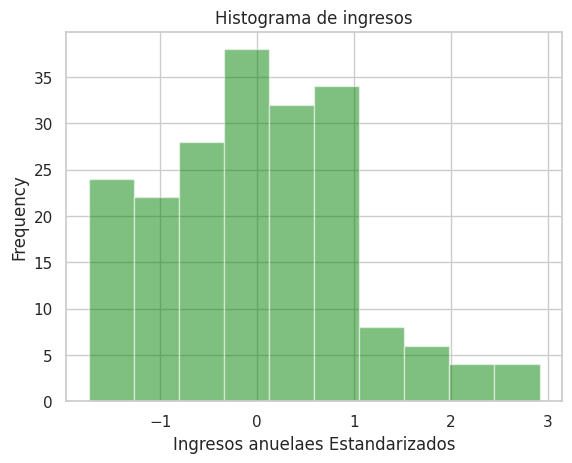

In [22]:
datos_a_escalar.ingresos.plot(kind="hist", color="green", alpha=0.5)
plt.title("Histograma de ingresos")
plt.xlabel("Ingresos anuelaes Estandarizados");

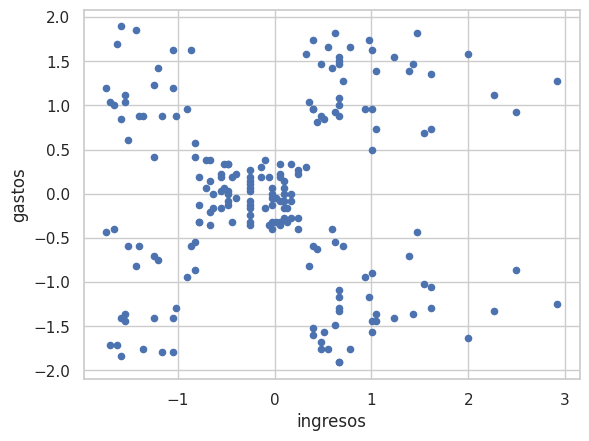

In [23]:
# cluseter columns
columnas_a_segmentar = ['ingresos', 'gastos']
datos_a_escalar.plot(kind="scatter", x=columnas_a_segmentar[0], y=columnas_a_segmentar[1]);

## AHORA CON EL USO DE K-MEANS

In [24]:
from sklearn.cluster import KMeans

In [25]:
modelo = KMeans(n_clusters=5, random_state=12)

In [26]:
# ejecutamos el modelo
modelo.fit(datos_a_escalar[columnas_a_segmentar])

KMeans(n_clusters=5, random_state=12)

In [27]:
# ahora en una columna segmento-2 vamos a colocar el resultado de la prediccion que hizo k means

datos_a_escalar['Segmento2'] = modelo.predict(datos_a_escalar[columnas_a_segmentar])

In [28]:
datos_a_escalar.Segmento.value_counts()

Segmento
ingreso moderado    106
ingreso bajo         72
ingreso alto         22
Name: count, dtype: int64

In [29]:
datos_a_escalar.Segmento2.value_counts()

Segmento2
1    81
3    39
2    35
0    23
4    22
Name: count, dtype: int64

In [30]:
marcadores = ['x','*', '.', '|','_']

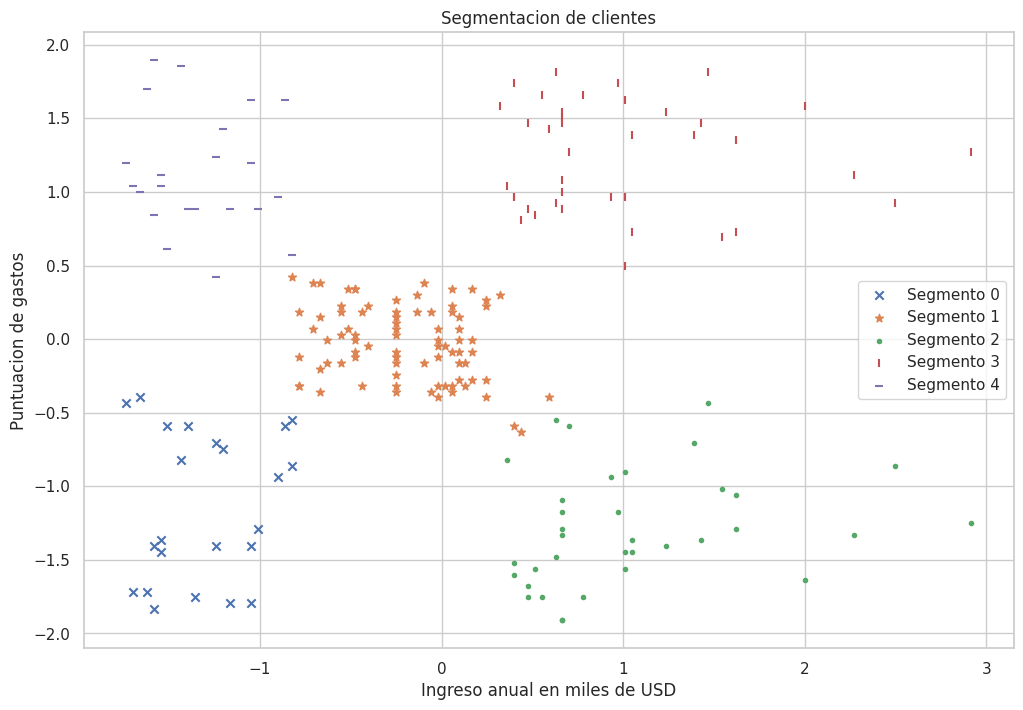

In [31]:
# recorrido segmento a segmento para plotear
plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura

for segmento in range(5):  # 5 segmentos desde 0 a 4
    dato_segmento_tmp = datos_a_escalar[datos_a_escalar.Segmento2 == segmento]
    plt.scatter(dato_segmento_tmp.ingresos, dato_segmento_tmp.gastos, marker=marcadores[segmento], label=f"Segmento {segmento}")

# pintado
plt.xlabel("Ingreso anual en miles de USD")
plt.ylabel("Puntuacion de gastos")
plt.title("Segmentacion de clientes")
plt.legend()
plt.show()

## Usar 2 dimensiones para el modelo

Como podemos usar mas de 2 dimensiones para las graficas, vamos a graficar en base a **columnas_a_escalar**

In [32]:
datos_a_escalar[columnas_a_escalar].head()

,edad,ingresos,gastos
CustomerID,,,
1,-1.424569,-1.738999,-0.434801
2,-1.281035,-1.738999,1.195704
3,-1.352802,-1.700830,-1.715913
4,-1.137502,-1.700830,1.040418
5,-0.563369,-1.662660,-0.395980


In [33]:
modelo2 = KMeans(n_clusters=4, random_state=17)

In [34]:
modelo2.fit(datos_a_escalar[columnas_a_escalar])

KMeans(n_clusters=4, random_state=17)

In [35]:
datos_a_escalar['Segmento3'] = modelo2.predict(datos_a_escalar[columnas_a_escalar])

In [36]:
datos_a_escalar

,genero,edad,ingresos,gastos,Segmento,Segmento2,Segmento3
CustomerID,,,,,,,
1,Male,-1.424569,-1.738999,-0.434801,ingreso bajo,0,0
2,Male,-1.281035,-1.738999,1.195704,ingreso bajo,4,0
3,Female,-1.352802,-1.700830,-1.715913,ingreso bajo,0,0
4,Female,-1.137502,-1.700830,1.040418,ingreso bajo,4,0
5,Female,-0.563369,-1.662660,-0.395980,ingreso bajo,0,0
...,...,...,...,...,...,...,...
196,Female,-0.276302,2.268791,1.118061,ingreso alto,3,2
197,Female,0.441365,2.497807,-0.861839,ingreso alto,2,3
198,Male,-0.491602,2.497807,0.923953,ingreso alto,3,2


In [37]:
from mpl_toolkits import mplot3d

In [38]:
# cuando usamos %matplotlib genera las graficas por defecto "inline", es decir que crea una ventana desde la linea de comandos 
# y el notebook captura lo que la consola devuelve y lo muestra en el output

# ahora probaremos invocar a las graficas desde notebook

columnas_a_escalar = [ 'edad', 'ingresos', 'gastos']

%matplotlib widget

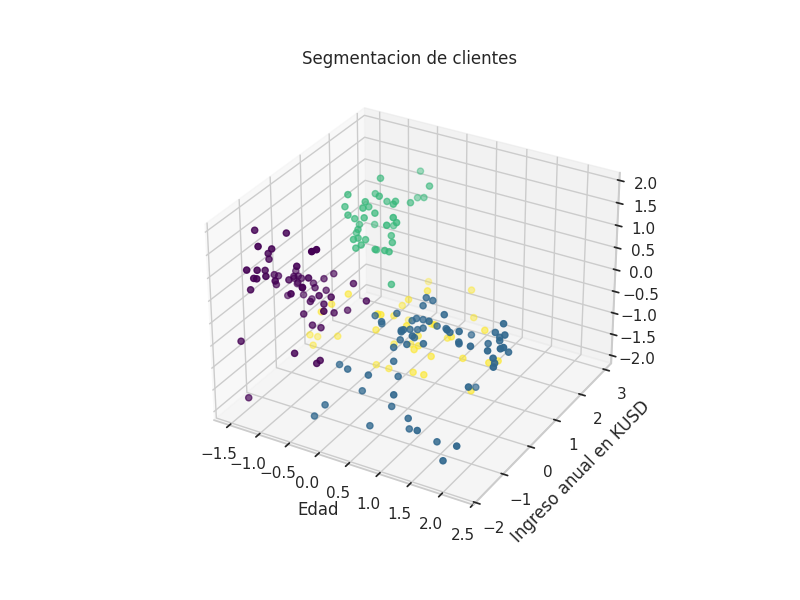

In [39]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(datos_a_escalar['edad'], datos_a_escalar['ingresos'], datos_a_escalar['gastos'], c=datos_a_escalar['Segmento3'], cmap='viridis')

plt.title("Segmentacion de clientes")
plt.xlabel("Edad")
plt.ylabel("Ingreso anual en KUSD ")
plt.show();

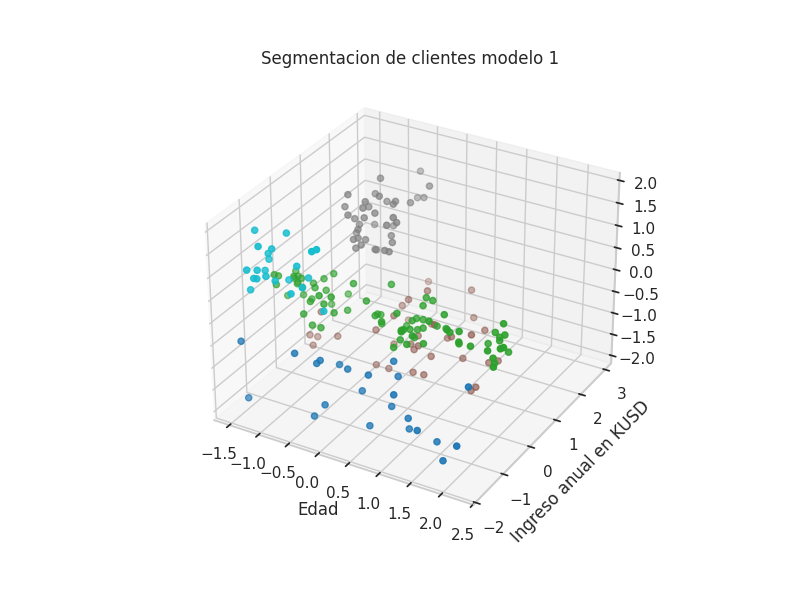

In [40]:
# PARA EL SEGMENTO 2

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(datos_a_escalar['edad'], datos_a_escalar['ingresos'], datos_a_escalar['gastos'], c=datos_a_escalar['Segmento2'], cmap='tab10')

plt.title("Segmentacion de clientes modelo 1")
plt.xlabel("Edad")
plt.ylabel("Ingreso anual en KUSD ")
plt.show();

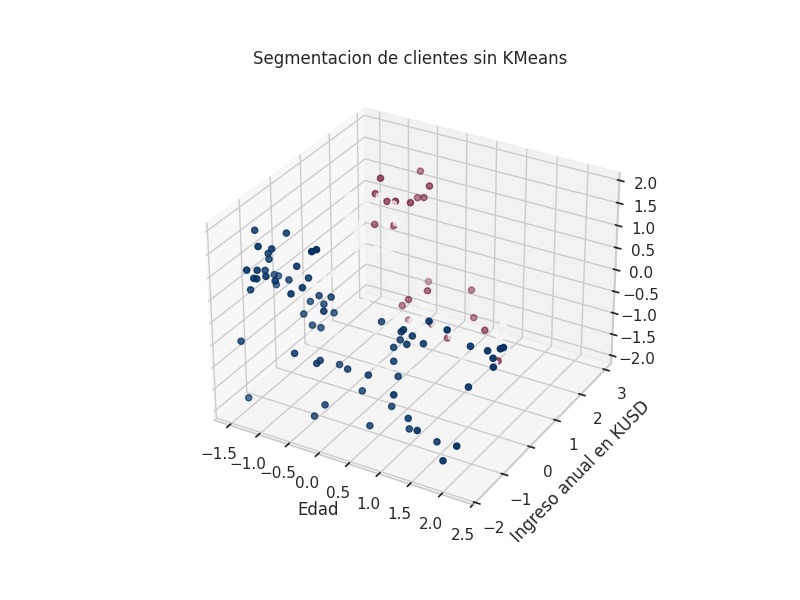

In [41]:
# PARA EL SEGMENTO 0

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
# Convertir los valores del segmento a números
segmento_numerico = datos_a_escalar['Segmento'].map({'ingreso bajo': 0, 'ingreso moderado': 1, 'ingreso alto': 2})
ax.scatter3D(datos_a_escalar['edad'], datos_a_escalar['ingresos'], datos_a_escalar['gastos'], c=segmento_numerico, cmap='RdBu_r')


# el inge lo hizo de esta forma
# from sklerarn.preprocessing import LabelEncoder
# le = LabelEncoder()
# datos_a_escalar['Segmento'] = le.fit_transform(datos_a_escalar['Segmento'])

plt.title("Segmentacion de clientes sin KMeans")
plt.xlabel("Edad")
plt.ylabel("Ingreso anual en KUSD ")
plt.show();

# Naive Bayes

In [42]:
# CLASIFICADOR, METRICAS Y SEPARADOR DE DATOS DE PRUEBA

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB

import sklearn.metrics as metrics


In [43]:
datos_a_escalar
# Male = 0, Female = 1
# datos_a_escalar.Segmento = LabelEncoder().fit_transform(datos_a_escalar.Segmento)
datos_a_escalar.genero = LabelEncoder().fit_transform(datos_a_escalar.genero)
datos_a_escalar

,genero,edad,ingresos,gastos,Segmento,Segmento2,Segmento3
CustomerID,,,,,,,
1,1,-1.424569,-1.738999,-0.434801,ingreso bajo,0,0
2,1,-1.281035,-1.738999,1.195704,ingreso bajo,4,0
3,0,-1.352802,-1.700830,-1.715913,ingreso bajo,0,0
4,0,-1.137502,-1.700830,1.040418,ingreso bajo,4,0
5,0,-0.563369,-1.662660,-0.395980,ingreso bajo,0,0
...,...,...,...,...,...,...,...
196,0,-0.276302,2.268791,1.118061,ingreso alto,3,2
197,0,0.441365,2.497807,-0.861839,ingreso alto,2,3
198,1,-0.491602,2.497807,0.923953,ingreso alto,3,2


In [44]:
# separacion de la etiqueta de clase (variable endogena) «Y» y las variables independientes (exogenas o explicativas) «X»
# Conjunto de entrenamiento
x_train = datos_a_escalar[columnas_a_escalar]
y_train = datos_a_escalar['Segmento']

# Conjunto de pruebas
x_test = datos_a_escalar[columnas_a_escalar]
y_test = datos_a_escalar['Segmento']

In [45]:

# clasificador gaussiano Naive Bayes
model_gnb = GaussianNB()
y_prediction = model_gnb.fit(x_train, y_train).predict(x_test)

print("Prediccion del clasificador gaussiano Naive Bayes en los datos de prueba {:0.3f}: ".format(metrics.accuracy_score(y_prediction, y_test)))

Prediccion del clasificador gaussiano Naive Bayes en los datos de prueba 0.985: 


In [46]:
datos_a_escalar['Naive_bayes'] = model_gnb.predict(datos_a_escalar[columnas_a_escalar])
datos_a_escalar

,genero,edad,ingresos,gastos,Segmento,Segmento2,Segmento3,Naive_bayes
CustomerID,,,,,,,,
1,1,-1.424569,-1.738999,-0.434801,ingreso bajo,0,0,ingreso bajo
2,1,-1.281035,-1.738999,1.195704,ingreso bajo,4,0,ingreso bajo
3,0,-1.352802,-1.700830,-1.715913,ingreso bajo,0,0,ingreso bajo
4,0,-1.137502,-1.700830,1.040418,ingreso bajo,4,0,ingreso bajo
5,0,-0.563369,-1.662660,-0.395980,ingreso bajo,0,0,ingreso bajo
...,...,...,...,...,...,...,...,...
196,0,-0.276302,2.268791,1.118061,ingreso alto,3,2,ingreso alto
197,0,0.441365,2.497807,-0.861839,ingreso alto,2,3,ingreso alto
198,1,-0.491602,2.497807,0.923953,ingreso alto,3,2,ingreso alto


# Arbol de decisiones

In [47]:
# ahora imprimimos el arbol de decision

from sklearn.tree import DecisionTreeClassifier, plot_tree

# Etiquetas de los datos
factores = datos_a_escalar[columnas_a_escalar]
etiquetas = ['ingreso alto', 'ingreso medio', 'ingreso bajo']



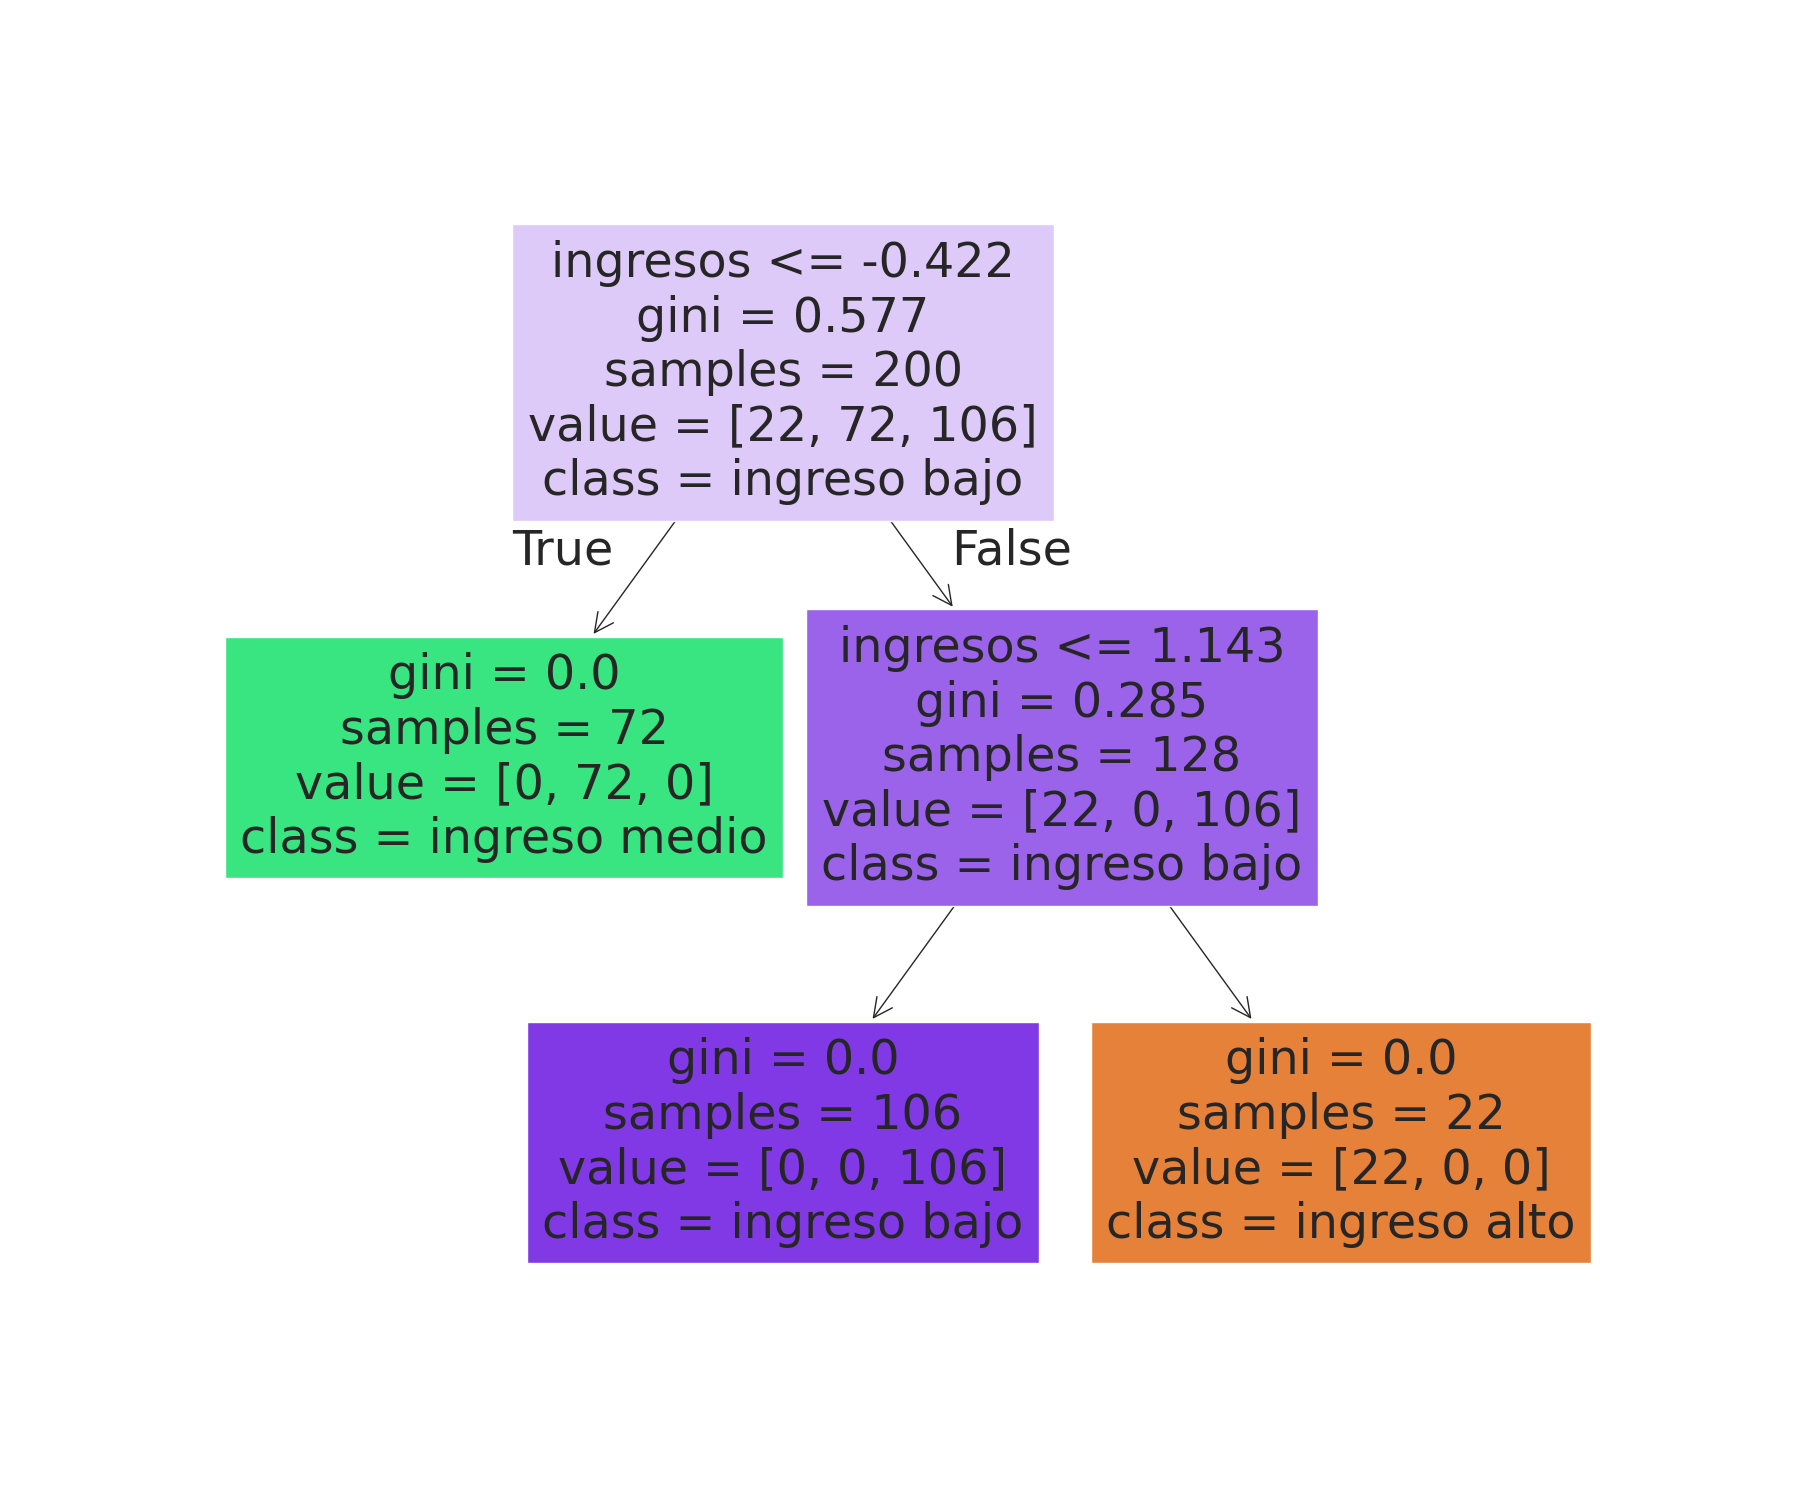

In [48]:
# Train a decision tree classifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)

# Plot the decision tree
plt.figure(figsize=(18, 15))
plot_tree(decision_tree_model, filled=True, feature_names=columnas_a_escalar, class_names=etiquetas);